In [13]:
''' Adapted from phantom.py'''
import sys
sys.path.insert(0, '../')

import numpy as np
import matplotlib.pyplot as plt 
from gasp import dataloader, view

In [2]:
filepath = '/Users/michael/projects/MRI/data/2019_GASP/20190507_GASP_LONG_TR_WATER/'
files = ['meas_MID12_TRUFI_TE12_FID42712.dat',
         'meas_MID13_TRUFI_TE24_FID42713.dat',
         'meas_MID14_TRUFI_TE48_FID42714.dat']

In [3]:
M0 = dataloader.read_rawdata(filepath + files[0], doChaAverage=False)['data']
M1 = dataloader.read_rawdata(filepath + files[1], doChaAverage=False)['data']
M2 = dataloader.read_rawdata(filepath + files[2], doChaAverage=False)['data']

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/528M [00:00<?, ?B/s]

read data:   0%|          | 0/32767 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/528M [00:00<?, ?B/s]

read data:   0%|          | 0/32767 [00:00<?, ?it/s]

pymapVBVD version 0.4.8
Software version: VB


Scan 1/1, read all mdhs:   0%|          | 0.00/528M [00:00<?, ?B/s]

read data:   0%|          | 0/32767 [00:00<?, ?it/s]

In [4]:
M0.shape # [Height, Width, Coil, PCs]

(256, 256, 4, 16)

In [11]:
M = np.stack([M0,M1,M2], axis=-1)
M.shape # [Height, Width, Coil, PCs, TRs]

(256, 256, 4, 16, 3)

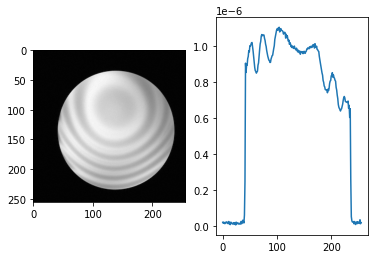

In [14]:
_ = np.sqrt(np.sum(np.abs(M)**2, axis=2))
_ = abs(_[:,:,0,2].T)
xx, yy = _.shape[:2]

#_ = abs(gs_recon(data[:, :, 0, ::4, 0], pc_axis=-1)).T

plt.subplot(1, 2, 1)
plt.imshow(_, cmap='gray')
plt.subplot(1, 2, 2)
plt.plot(_[int(xx/2), :])
plt.show()